# Credit Risk DataSet

In [115]:
##Import Some Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [116]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [117]:
df.shape

(32581, 12)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [119]:
## Checking the Missing values of the dataset 
df.isnull().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Person Employee Length

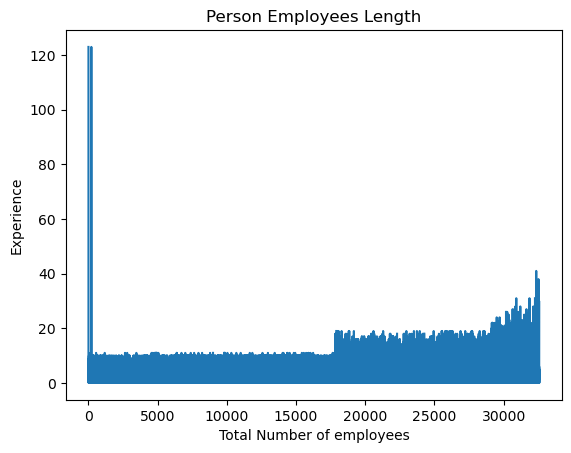

In [120]:
plt.Figure(figsize=(10,8))
df['person_emp_length'].plot()
plt.xlabel("Total Number of employees")
plt.ylabel("Experience")
plt.title("Person Employees Length")
plt.show()

C:\Users\chilesh\AppData\Local\Temp\ipykernel_12764\4009493512.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='person_emp_length',data = df,palette=['Blue'])


<function matplotlib.pyplot.show(close=None, block=None)>

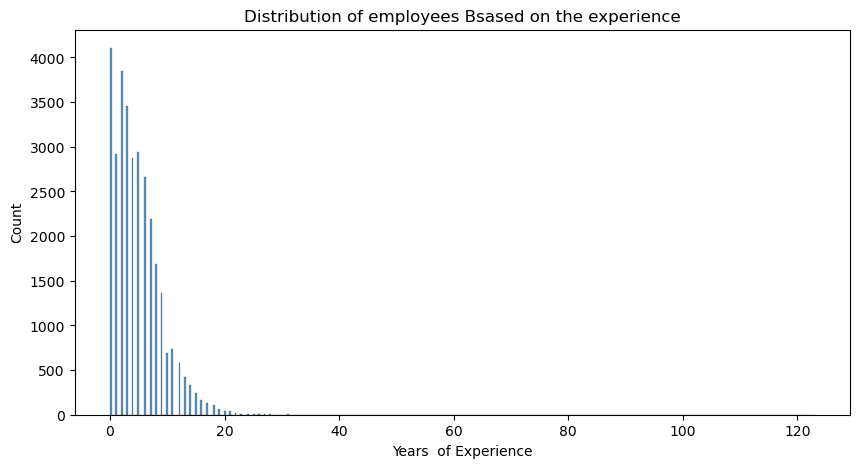

In [121]:
plt.figure(figsize=(10,5))
sns.histplot(x='person_emp_length',data = df,palette=['Blue'])
plt.title('Distribution of employees Bsased on the experience')
plt.xlabel("Years  of Experience")
plt.show

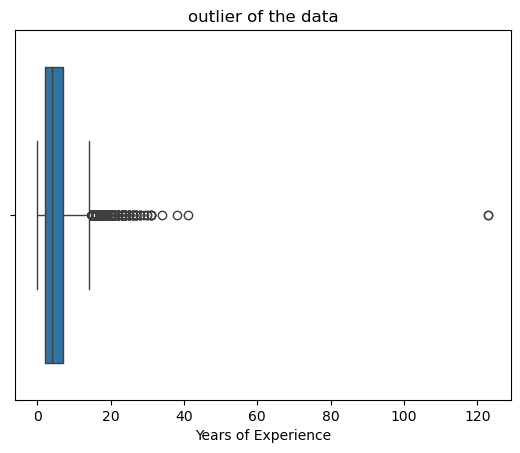

In [122]:
## Here it help to find the Outliers
sns.boxplot(x='person_emp_length',data = df)
plt.title('outlier of the data')
plt.xlabel('Years of Experience')
plt.show()

## Intrest Rate 

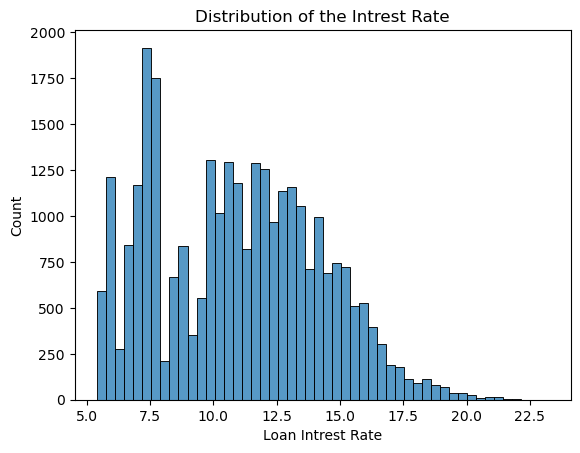

In [123]:
sns.histplot(x ='loan_int_rate',data=df)
plt.title('Distribution of the Intrest Rate')
plt.xlabel('Loan Intrest Rate')
plt.show()

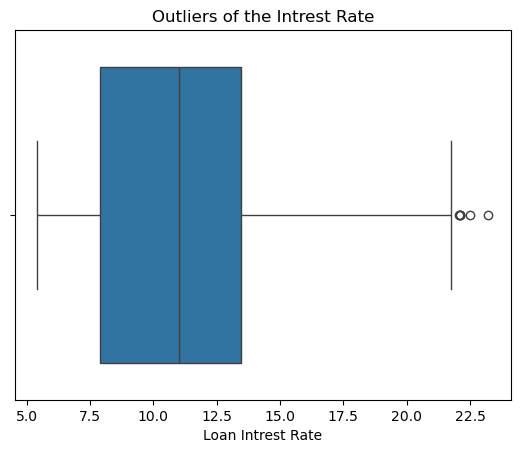

In [124]:
sns.boxplot(x ='loan_int_rate',data=df)
plt.title('Outliers of the Intrest Rate')
plt.xlabel('Loan Intrest Rate')
plt.show()

In [125]:
## Filling the missing values

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())



In [126]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# EDA

In [127]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [128]:
corr_col=df.select_dtypes(exclude = 'object').columns

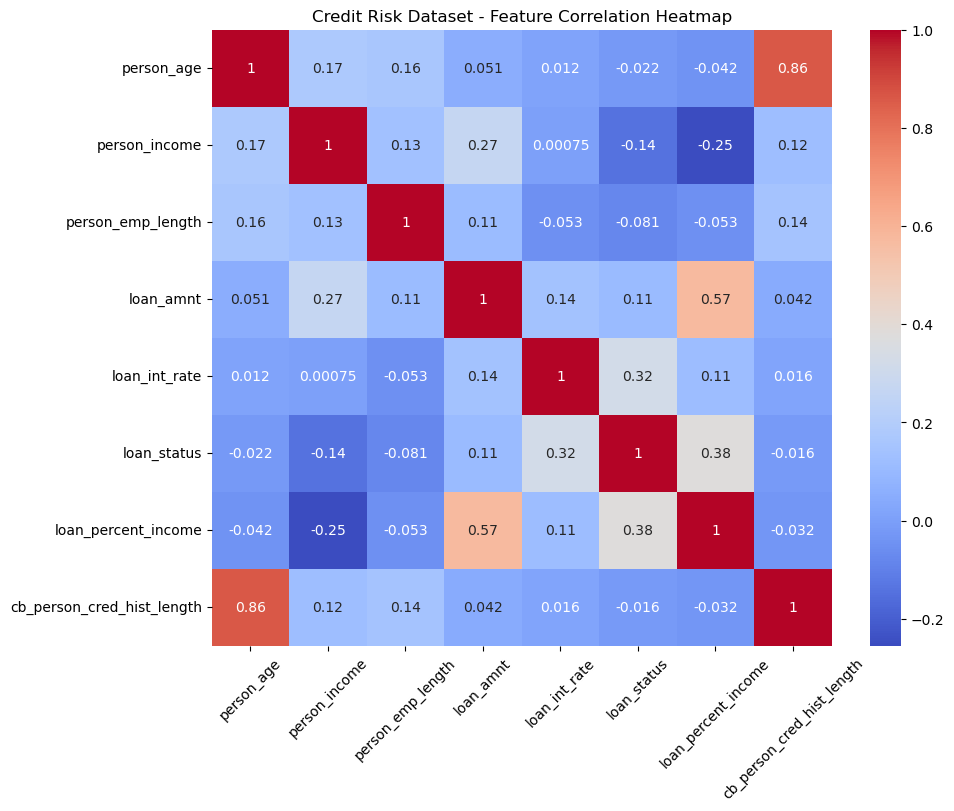

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_col].corr(),annot= True ,cmap= 'coolwarm')
plt.title("Credit Risk Dataset - Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

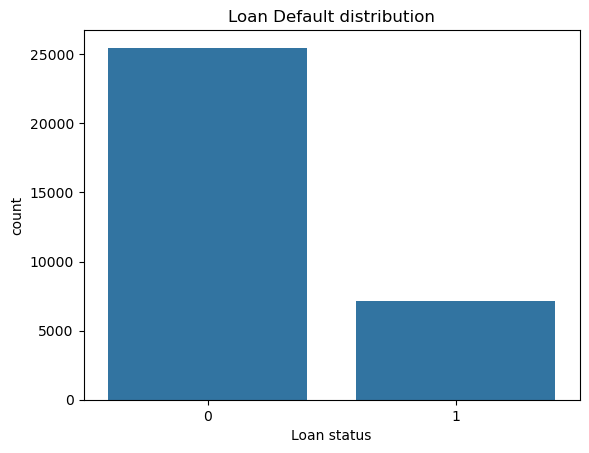

In [130]:
## Loan Status 
sns.countplot(x ='loan_status',data= df)
plt.title('Loan Default distribution')
plt.xlabel('Loan status')
plt.show()

## “From the target column, we can see that the data is imbalanced, so we need to balance the data before training the model.”

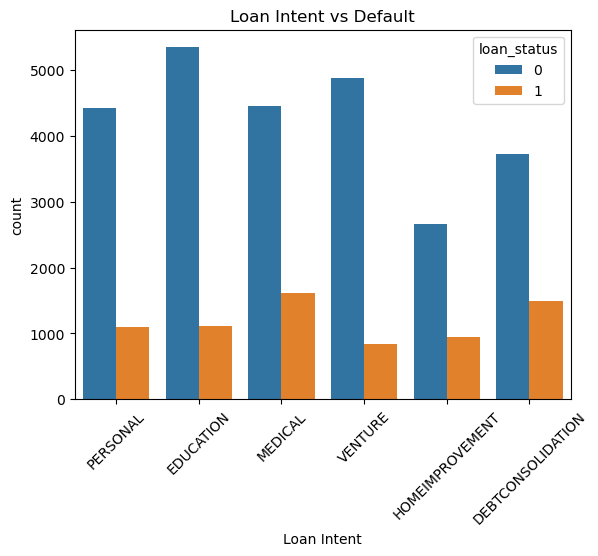

In [131]:
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.title("Loan Intent vs Default")
plt.xlabel('Loan Intent')
plt.xticks(rotation=45)
plt.show()

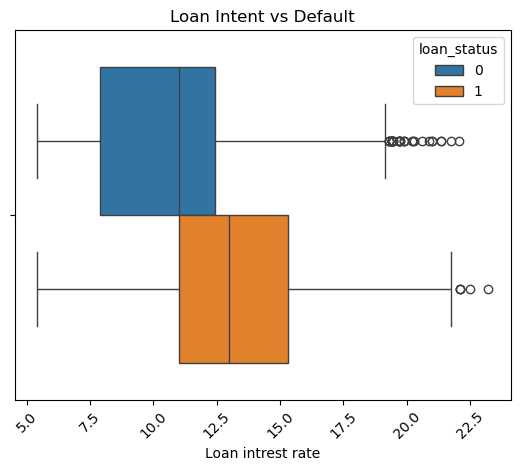

In [132]:
sns.boxplot(x='loan_int_rate', hue='loan_status', data=df)
plt.title("Loan Intent vs Default")
plt.xlabel('Loan intrest rate')
plt.xticks(rotation=45)
plt.show()

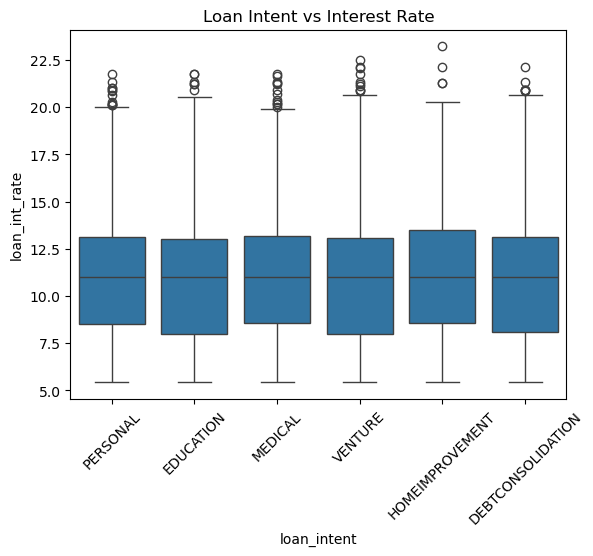

In [133]:
sns.boxplot(x='loan_intent', y='loan_int_rate', data=df)
plt.title("Loan Intent vs Interest Rate")
plt.xticks(rotation=45)
plt.show()


## We can see the Different between the intrest rate of Loan intent

* HomeImprovemnet :- it a high intrest rate and also outliear
* Most of the intrest rate lies between 10.0 - 12.5
* 

In [134]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

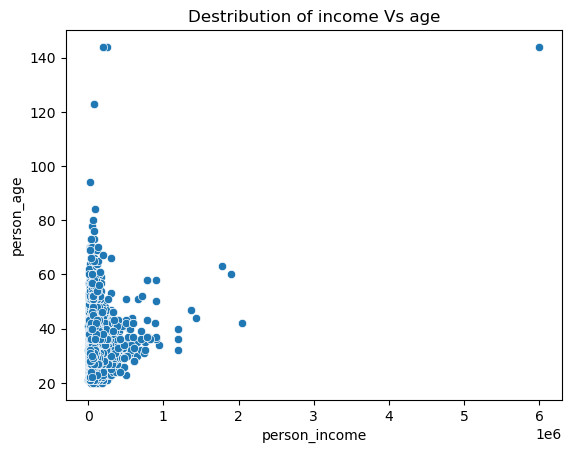

In [135]:
sns.scatterplot(x='person_income',y='person_age',data=df)
plt.title('Destribution of income Vs age')
plt.show()

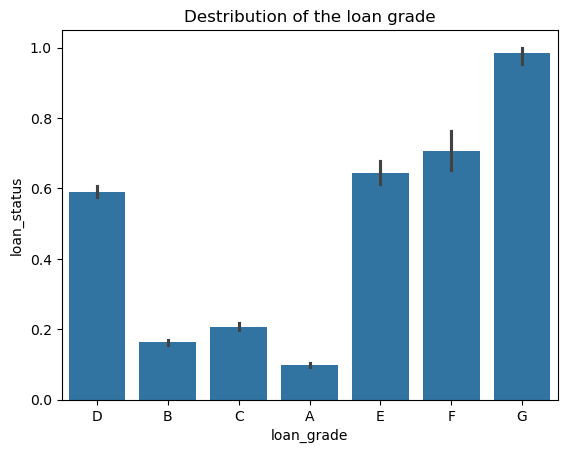

In [ ]:
sns.barplot(x='loan_grade',y='loan_status',data=df)
plt.title('Destribution of the loan grade')
plt.xlabel('Loan grade')
plt.show() 

## Feature Engineering